In [1]:
# Prediction of Heart Disease using Logistic Regression and Random Forest Classifier.

In [2]:
# The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Imported necessary libraries

In [5]:
url='https://drive.google.com/file/d/1KEwDHC_A2n0Uy4S_c_fQWRIvSscWrOx4/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

In [6]:
# Reading data into a DataFrame from dataset stored on my Google Drive.

In [7]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [8]:
df.shape

(4238, 16)

In [9]:
# Contains 4238 rows and 16 columns

In [10]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [11]:
df.tail(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4228,0,50,1.0,0,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [12]:
# Viewed the head and tail of the df to get a basic idea of the dataset.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [14]:
# Descriptive statistics.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [16]:
# 9 Float, 7 int datatype columns. No wrong datatype columns.

In [17]:
df.diabetes.value_counts()

0    4129
1     109
Name: diabetes, dtype: int64

In [18]:
# 109 people have diabetes.

In [19]:
df.groupby('diabetes').age.mean()

diabetes
0    49.443933
1    54.926606
Name: age, dtype: float64

In [20]:
# Mean age of people having diabetes is 54.92

In [21]:
df.BPMeds.value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [22]:
# 124 people are on BP medication.

In [23]:
df.groupby('BPMeds').age.mean()

BPMeds
0.0    49.351638
1.0    55.556452
Name: age, dtype: float64

In [24]:
# Mean age of people on BP medication is 55.55.

In [25]:
df.currentSmoker.value_counts()

0    2144
1    2094
Name: currentSmoker, dtype: int64

In [26]:
# 2094 people are current smokers.

In [27]:
df.groupby('currentSmoker').age.mean()

currentSmoker
0    51.395522
1    47.731137
Name: age, dtype: float64

In [28]:
# Mean age of people who smoke currently is 47.73.

In [29]:
df.prevalentHyp.value_counts()

0    2922
1    1316
Name: prevalentHyp, dtype: int64

In [30]:
df.groupby('prevalentHyp').age.mean()

prevalentHyp
0    47.817933
1    53.508359
Name: age, dtype: float64

In [31]:
# Mean age of people who have prevalent Hypertension is 53.50.

In [32]:
((df.diaBP<77) & (df.sysBP>123)).sum()

265

In [33]:
# People with abnormal levels of diastolic and systolic BP.

In [34]:
((df.heartRate<60) + (df.heartRate>85)).value_counts()

False    3264
True      974
Name: heartRate, dtype: int64

In [35]:
# 974 people with abnormal heart rates

In [36]:
df.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [37]:
# Target variable

In [38]:
df.isna().sum(axis = 1).sum()

645

In [39]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

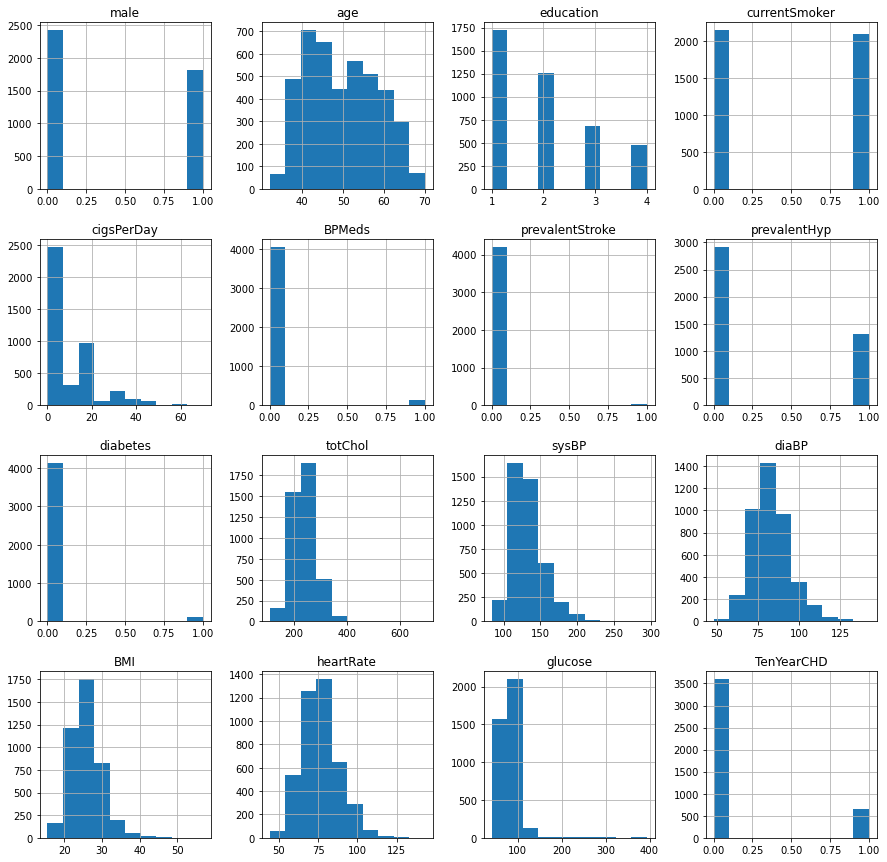

In [40]:
df.hist(figsize=(15,15))

In [41]:
df1=df.drop('education',axis=1)

In [42]:
# Dropped Education column as it is irrelevant to the prediction.

In [43]:
df1.loc[df1.heartRate.isna()]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [44]:
# The patient whose heart rate value is missing.

In [45]:
df1.isna().sum().sum()

540

In [46]:
# Total NaN values in the DataFrame.

In [47]:
(df1.isna().sum(axis=1) > 0).sum()

489

In [48]:
# Rows with at least ONE NaN value.

In [49]:
df1.dropna(inplace=True)

In [50]:
# Dropping NaN rows

In [51]:
df1.shape

(3749, 15)

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
# Importing library used to scale data.

In [54]:
scaler = MinMaxScaler()

In [55]:
df2=pd.DataFrame((scaler.fit_transform(df1)),columns=df1.columns)
df2

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.140652,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.234991,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.226415,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.192110,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.295026,0.219858,0.380952,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,1.0,0.684211,0.0,0.000000,0.0,0.0,1.0,0.0,0.126930,0.271868,0.349206,0.228308,0.363636,0.115819,0.0
3745,1.0,0.947368,0.0,0.000000,0.0,0.0,1.0,0.0,0.108062,0.399527,0.518519,0.184198,0.161616,0.110169,1.0
3746,1.0,0.473684,1.0,0.014286,0.0,0.0,1.0,0.0,0.343053,0.451537,0.465608,0.252787,0.222222,0.129944,1.0
3747,1.0,0.500000,1.0,0.614286,0.0,0.0,0.0,0.0,0.161235,0.203310,0.338624,0.101066,0.212121,0.079096,0.0


In [56]:
# Scaling the columns of numerical datatype, importing the scaled data 
# and providing the relevant column names into a new DataFrame.

In [57]:
x=df2.drop('TenYearCHD',axis=1)
y=df2.TenYearCHD

In [58]:
# Splitting the DataFrame into dependent and independent variables.

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [60]:
# Splitting the variables into train and test data.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import metrics

In [62]:
# Importing libraries needed for logistic regression.

In [63]:
reg=linear_model.LogisticRegression()
reg.fit(x_train,y_train)
print("accuracy: "+ str(reg.score(x_test,y_test)*100) + "%")

accuracy: 85.33333333333334%


In [64]:
# Fitting the train data on the logistic regression model.

In [65]:
y_pred=reg.predict(x_test)

In [66]:
# Predicting the test data on the model fitted with train data.

In [67]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[637,   4],
       [106,   3]], dtype=int64)

In [68]:
# Confusion matrix.

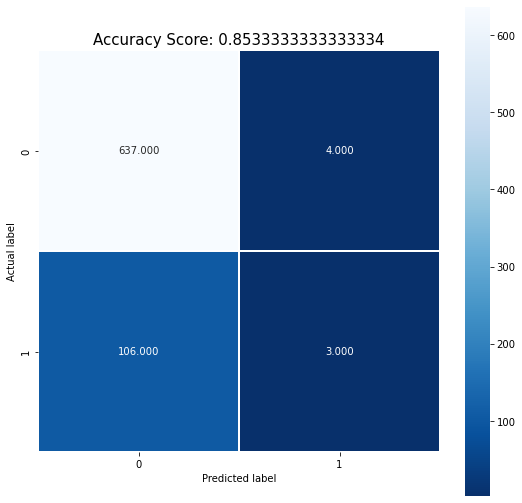

In [69]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg.score(x_test,y_test))
plt.title(all_sample_title, size = 15);

In [70]:
# True Positive - 637
# True negative - 3
# False Positive - 4
# False Negative - 106

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred,average="weighted"))

Accuracy: 0.8533333333333334
Precision: 0.42857142857142855
Recall: 0.027522935779816515
F1 Score: 0.7942551989901003


In [72]:
# Even though the accuracy is 85.33%, the Recall is 2%.
# The False Negative is 106. 106 people might have the probablity of disease, but were predicted as healthy.

In [73]:
# As this prediction is related to disease, it is dangerous if diseased people are labeled as healthy.
# Hence, below is an attempt to reduce the False Negatives.

In [74]:
reg1=linear_model.LogisticRegression(C=0.01,class_weight='balanced',solver='liblinear')
reg1.fit(x_train,y_train)
print("accuracy: "+ str(reg1.score(x_test,y_test)*100) + "%")

accuracy: 62.53333333333333%


In [75]:
# Fitting the train data on the logistic regression model.

In [76]:
y_pred1=reg1.predict(x_test)

In [77]:
# Predicting the test data on the model fitted with train data.

In [78]:
cm1 = metrics.confusion_matrix(y_test, y_pred1)
cm1

array([[398, 243],
       [ 38,  71]], dtype=int64)

In [79]:
# Confusion matrix.

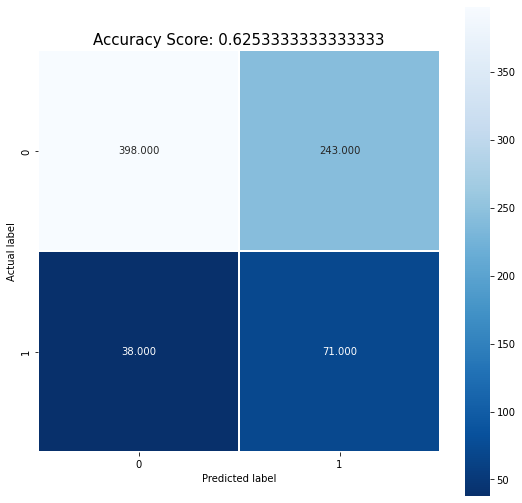

In [80]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg1.score(x_test,y_test))
plt.title(all_sample_title, size = 15);

In [81]:
# True Positive - 398
# True negative - 71
# False Positive - 243
# False Negative - 38

In [82]:
# False Negatives reduced to 38. Hence only 38 patients were predicted as healthy,
# even though there is a probablity that they will be diseased.

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))
print("F1 Score:",metrics.f1_score(y_test, y_pred1,average="weighted"))

Accuracy: 0.6253333333333333
Precision: 0.22611464968152867
Recall: 0.6513761467889908
F1 Score: 0.68046366428065


In [84]:
# Accuracy is 62.53%. Here we have traded off accuracy for better Recall of 65%.
# As a predictor for patients with diseases, the basic need is to reduce False Negatives as much as possible.

In [85]:
y_pred2=reg1.predict(x)
print("accuracy: "+ str(reg1.score(x,y)*100) + "%")

accuracy: 62.89677247265938%


In [86]:
cm1 = metrics.confusion_matrix(y, y_pred2)
cm1

array([[1957, 1220],
       [ 171,  401]], dtype=int64)

In [87]:
# Confusion matrix

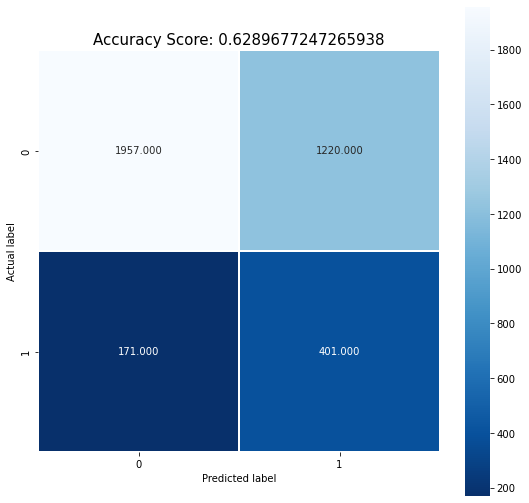

In [88]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(reg1.score(x,y))
plt.title(all_sample_title, size = 15);

In [89]:
# True Positive - 1957
# True negative - 1220
# False Positive - 171
# False Negative - 401

In [90]:
print("Accuracy:",metrics.accuracy_score(y, y_pred2))
print("Precision:",metrics.precision_score(y, y_pred2))
print("Recall:",metrics.recall_score(y, y_pred2))
print("F1 Score:",metrics.f1_score(y, y_pred2,average="weighted"))

Accuracy: 0.6289677247265938
Precision: 0.2473781616286243
Recall: 0.701048951048951
F1 Score: 0.6810239592730121


In [91]:
# Recall increased to 70% for actual data.

In [92]:
# Below is an attempt to get better accuracy and recall simultaneously.

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [94]:
# Importing libraries needed for Random Forest Classifier.

In [95]:
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred3 = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.8493333333333334


In [96]:
# Fitting the train data on the Random Forest Classifier model.

In [97]:
cm2 = metrics.confusion_matrix(y_test, y_pred3)
cm2

array([[632,   9],
       [104,   5]], dtype=int64)

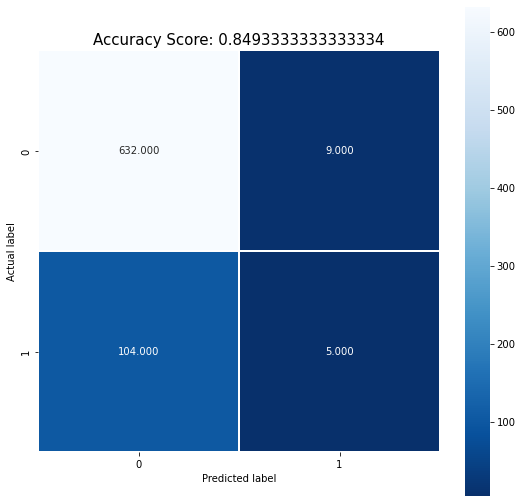

In [98]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test,y_test))
plt.title(all_sample_title, size = 15);

In [99]:
# True Positive - 632
# True negative - 5
# False Positive - 9
# False Negative - 104

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:",metrics.precision_score(y_test, y_pred3))
print("Recall:",metrics.recall_score(y_test, y_pred3))
print("F1 Score:",metrics.f1_score(y_test, y_pred3,average="weighted"))

Accuracy: 0.8493333333333334
Precision: 0.35714285714285715
Recall: 0.045871559633027525
F1 Score: 0.7963463402825749


In [101]:
y_pred4 = model.predict(x)

print("Accuracy Score:",accuracy_score(y,y_pred4))

Accuracy Score: 0.9698586289677247


In [102]:
cm2 = metrics.confusion_matrix(y, y_pred4)
cm2

array([[3168,    9],
       [ 104,  468]], dtype=int64)

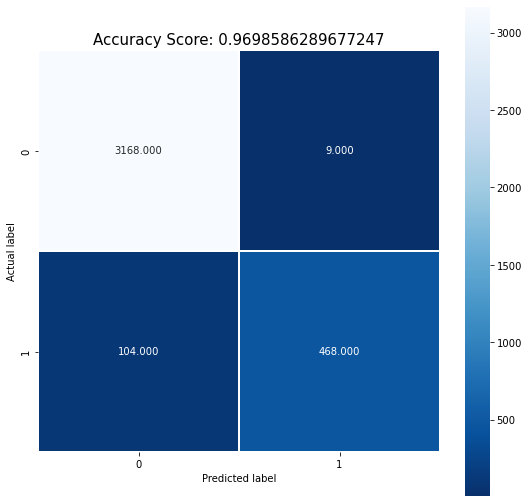

In [103]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x,y))
plt.title(all_sample_title, size = 15);

In [104]:
# True Positive - 3168
# True negative - 468
# False Positive - 9
# False Negative - 104

In [105]:
print("Accuracy:",metrics.accuracy_score(y, y_pred4))
print("Precision:",metrics.precision_score(y, y_pred4))
print("Recall:",metrics.recall_score(y, y_pred4))
print("F1 Score:",metrics.f1_score(y, y_pred4,average="weighted"))

Accuracy: 0.9698586289677247
Precision: 0.9811320754716981
Recall: 0.8181818181818182
F1 Score: 0.9687157966651458


In [106]:
# Accuracy increased to 96.98%, while Recall is 81.81%, indicating far lesser number of False Negative 
# cases than logistic regression. Model is successful, as Accuracy is high, Precision is 98.1% and Recall is 81.81%